## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('raw_data/HDR21-22_Composite_indices_complete_time_series.csv')

In [3]:
data.head()


,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [4]:
data.describe()

,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
count,191.000000,152.000000,152.000000,152.000000,152.000000,152.000000,163.000000,163.000000,163.000000,163.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,95.811518,0.595112,0.597862,0.600493,0.604474,0.609329,0.613908,0.619663,0.624975,0.630417,...,15.249784,15.385926,15.347629,15.352632,15.342119,15.491780,14.597416,14.776332,14.775408,14.774396
std,55.307333,0.161918,0.161921,0.162193,0.163122,0.163818,0.162789,0.163461,0.164299,0.165177,...,14.134572,14.555342,14.363092,14.680340,15.015809,15.333709,13.581871,14.266308,14.266504,14.266706
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.430000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.477750,0.477000,0.475250,0.474250,0.476500,0.480500,0.488500,0.490000,0.492000,...,4.597500,4.525000,4.452375,4.457500,4.517500,4.575000,4.612500,4.732500,4.732500,4.732500
50%,96.000000,0.621500,0.623500,0.622000,0.624000,0.623500,0.642000,0.650000,0.651000,0.657000,...,10.907725,11.272314,10.745000,10.260000,10.590000,10.895000,11.215000,11.030000,11.030000,11.030000
75%,143.500000,0.725500,0.727000,0.723750,0.724250,0.733750,0.737000,0.743000,0.752500,0.759000,...,20.345000,20.397500,20.227500,20.187500,19.350000,19.757500,18.432500,17.932500,17.932500,17.932500
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.560000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


In [5]:
data.shape[0]

206

In [6]:
y= pd.read_csv('raw_data/global-hunger-index.csv')

In [7]:
y.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [8]:
classes = y['Entity'].unique()

print("Classes presentes no dataset:")
for classe in classes:
    print(classe)

Classes presentes no dataset:
Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Azerbaijan
Bangladesh
Belarus
Benin
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Democratic Republic of Congo
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Eswatini
Ethiopia
Fiji
Gabon
Gambia
Georgia
Ghana
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
India
Indonesia
Iran
Iraq
Jamaica
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Nicaragua
Niger
Nigeria
North Korea
North Macedonia
Oman
Pakistan
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Romania
Russia
Rwanda
Saudi Arabia
Senegal
Serbia
Sierra Leone
Slovakia
Solomon Islands
Somalia
South Africa
So

In [9]:
y.shape[0]

471

In [10]:
classes = data['country'].unique()

print("Classes presentes no dataset:")
for classe in classes:
    print(classe)

Classes presentes no dataset:
Afghanistan
Angola
Albania
Andorra
United Arab Emirates
Argentina
Armenia
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bolivia (Plurinational State of)
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo (Democratic Republic of the)
Congo
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
France
Micronesia (Federated States of)
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Guatemala
Guyana
Hong Kong, China (SAR)
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran (Islamic Republic of)
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
Kiribati
Saint 

In [11]:
# Identificar como seria as chaves primárias (países?) --> code e Iso3 como chaves primárias
# fazer o Join
#limpar os dados (identificar Nan e "")

#Simplificando o vetor target
y = y.drop(columns=['411773-annotations'])


In [12]:
y

,Entity,Code,Year,Global Hunger Index (2021)
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
4,Albania,ALB,2000,20.7
...,...,...,...,...
466,Yemen,YEM,2006,38.8
467,Yemen,YEM,2012,38.4
468,Yemen,YEM,2021,45.1
469,Zambia,ZMB,2021,27.5


In [13]:
print(data.columns)

Index(['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990',
       'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
       ...
       'mf_2012', 'mf_2013', 'mf_2014', 'mf_2015', 'mf_2016', 'mf_2017',
       'mf_2018', 'mf_2019', 'mf_2020', 'mf_2021'],
      dtype='object', length=1008)


In [14]:
anos = [2012,2021]
indicadores = ['hdi','le','eys','mys','gnipc','gdi','hdi_f','le_f','eys_f','mys_f','gni_pc_f','hdi_m','le_m','eys_m','mys_m','gni_pc_m','ihdi','coef_ineq','loss','ineq_le','ineq_edu','ineq_inc','gii','mmr','abr','se_f','se_m','pr_f','pr_m','lfpr_f','lfpr_m','phdi','diff_hdi_phdi','co2_prod','mf']
df = {
    'iso3':[],
    'year':[]
}

for indicador in range(len(indicadores)): 
    df[indicadores[indicador]] = []
    

for i in data.iterrows():
    for ano in anos:
        df['iso3'].append(i[1]['iso3'])
        df['year'].append(ano)
        for idx,indicador in enumerate(indicadores):
            df[indicador].append(i[1][f'{indicadores[idx]}_{ano}'])
X = pd.DataFrame(df)
X
    

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf
0,AFG,2012,0.466,61.923000,9.577323,2.209473,2125.862821,0.649,0.344152,63.513500,...,2.229978,12.966910,27.635328,72.364672,15.879000,76.420000,0.461,1.072961,0.327922,1.860000
1,AFG,2021,0.478,61.982400,10.263844,2.985070,1824.190915,0.681,0.364840,65.279100,...,6.395730,14.865710,27.215190,72.784810,14.848000,66.515000,0.474,0.836820,0.312376,1.380000
2,AGO,2012,0.541,58.623100,10.082500,3.909642,7280.845666,0.848,0.494561,61.023600,...,20.316778,35.316688,34.090909,65.909091,74.834000,79.922000,0.525,2.957486,1.346212,4.090000
3,AGO,2021,0.586,61.643400,12.172100,5.417391,5465.617791,0.903,0.556745,64.306600,...,28.163900,51.546170,29.545455,70.454545,73.968000,79.071000,0.577,1.535836,0.675410,2.180000
4,ALB,2012,0.778,78.064000,14.586650,10.025110,11146.263030,0.974,0.766864,80.702500,...,85.216042,89.429382,15.714286,84.285714,48.778000,65.197000,0.724,6.940874,1.601835,12.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,ZZI.SA,2021,0.632,67.855530,11.562208,6.710321,6481.393135,0.852,0.568257,69.760419,...,42.188378,52.817241,17.577855,82.422145,21.594128,71.585599,0.609,3.639241,1.843217,5.102134
408,ZZJ.SSA,2012,0.516,57.987394,9.546207,5.120678,3551.647275,0.888,0.484847,59.584516,...,26.191204,38.290734,20.634746,79.365254,63.996598,74.062532,0.504,2.325581,0.872779,3.437760
409,ZZJ.SSA,2021,0.547,60.112467,10.267338,6.001639,3698.868914,0.907,0.519216,62.124062,...,31.147249,44.269573,25.715752,74.284248,62.144428,72.253662,0.536,2.010969,0.719480,3.140740
410,ZZK.WORLD,2012,0.709,71.289119,12.106047,7.981302,14356.941280,0.944,0.686913,73.794031,...,56.907854,65.423955,20.291811,79.708189,48.194490,75.158865,0.644,9.167842,4.708761,12.186601


In [15]:
# colocar os indicadores na lista de indicadores (o que tem mais valor?)
# fazer um merge com y --> check no dataframe final
# analisar exploratoria
# limpar dados? 

X_y = X.merge(y,left_on=['iso3','year'],right_on=['Code','Year'], how= 'inner')
X_y

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf,Entity,Code,Year,Global Hunger Index (2021)
0,AFG,2012,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.344152,63.5135,...,15.879,76.420,0.461,1.072961,0.327922,1.86,Afghanistan,AFG,2012,34.3
1,AFG,2021,0.478,61.9824,10.263844,2.985070,1824.190915,0.681,0.364840,65.2791,...,14.848,66.515,0.474,0.836820,0.312376,1.38,Afghanistan,AFG,2021,28.3
2,AGO,2012,0.541,58.6231,10.082500,3.909642,7280.845666,0.848,0.494561,61.0236,...,74.834,79.922,0.525,2.957486,1.346212,4.09,Angola,AGO,2012,27.8
3,AGO,2021,0.586,61.6434,12.172100,5.417391,5465.617791,0.903,0.556745,64.3066,...,73.968,79.071,0.577,1.535836,0.675410,2.18,Angola,AGO,2021,26.0
4,ALB,2012,0.778,78.0640,14.586650,10.025110,11146.263030,0.974,0.766864,80.7025,...,48.778,65.197,0.724,6.940874,1.601835,12.44,Albania,ALB,2012,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,YEM,2021,0.455,63.7534,9.098710,3.200000,1314.270189,0.496,0.262570,67.1339,...,5.995,67.637,0.448,1.538462,0.327510,2.89,Yemen,YEM,2021,45.1
240,ZAF,2012,0.696,61.8457,13.497650,9.934320,13602.253520,0.969,0.682448,64.4489,...,45.114,60.248,0.621,10.775862,8.728295,9.55,South Africa,ZAF,2012,12.7
241,ZAF,2021,0.713,62.3410,13.643710,11.373160,12948.373250,0.944,0.685864,64.9992,...,46.212,59.883,0.648,9.116410,7.620420,7.55,South Africa,ZAF,2021,12.9
242,ZMB,2021,0.565,61.2234,10.928760,7.187091,3217.767739,0.965,0.554427,63.9276,...,69.230,77.847,0.557,1.415929,0.357535,2.38,Zambia,ZMB,2021,27.5


In [16]:
X_y = X_y.drop(columns=['Year','Code'])

In [17]:
X_y

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,pr_f,pr_m,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf,Entity,Global Hunger Index (2021)
0,AFG,2012,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.344152,63.5135,...,27.635328,72.364672,15.879,76.420,0.461,1.072961,0.327922,1.86,Afghanistan,34.3
1,AFG,2021,0.478,61.9824,10.263844,2.985070,1824.190915,0.681,0.364840,65.2791,...,27.215190,72.784810,14.848,66.515,0.474,0.836820,0.312376,1.38,Afghanistan,28.3
2,AGO,2012,0.541,58.6231,10.082500,3.909642,7280.845666,0.848,0.494561,61.0236,...,34.090909,65.909091,74.834,79.922,0.525,2.957486,1.346212,4.09,Angola,27.8
3,AGO,2021,0.586,61.6434,12.172100,5.417391,5465.617791,0.903,0.556745,64.3066,...,29.545455,70.454545,73.968,79.071,0.577,1.535836,0.675410,2.18,Angola,26.0
4,ALB,2012,0.778,78.0640,14.586650,10.025110,11146.263030,0.974,0.766864,80.7025,...,15.714286,84.285714,48.778,65.197,0.724,6.940874,1.601835,12.44,Albania,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,YEM,2021,0.455,63.7534,9.098710,3.200000,1314.270189,0.496,0.262570,67.1339,...,0.294118,99.705882,5.995,67.637,0.448,1.538462,0.327510,2.89,Yemen,45.1
240,ZAF,2012,0.696,61.8457,13.497650,9.934320,13602.253520,0.969,0.682448,64.4489,...,41.059603,58.940397,45.114,60.248,0.621,10.775862,8.728295,9.55,South Africa,12.7
241,ZAF,2021,0.713,62.3410,13.643710,11.373160,12948.373250,0.944,0.685864,64.9992,...,45.982143,54.017857,46.212,59.883,0.648,9.116410,7.620420,7.55,South Africa,12.9
242,ZMB,2021,0.565,61.2234,10.928760,7.187091,3217.767739,0.965,0.554427,63.9276,...,15.060241,84.939759,69.230,77.847,0.557,1.415929,0.357535,2.38,Zambia,27.5


In [18]:
#fazer um merge com as subregiões de cada país
countries = pd.read_csv('raw_data/countryContinent.csv', encoding='latin-1')

X_with_sub_region = X_y.merge(countries[['sub_region', 'code_3']] ,left_on=['iso3'], right_on=['code_3'])
X_with_sub_region

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf,Entity,Global Hunger Index (2021),sub_region,code_3
0,AFG,2012,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.344152,63.5135,...,15.879,76.420,0.461,1.072961,0.327922,1.86,Afghanistan,34.3,Southern Asia,AFG
1,AFG,2021,0.478,61.9824,10.263844,2.985070,1824.190915,0.681,0.364840,65.2791,...,14.848,66.515,0.474,0.836820,0.312376,1.38,Afghanistan,28.3,Southern Asia,AFG
2,AGO,2012,0.541,58.6231,10.082500,3.909642,7280.845666,0.848,0.494561,61.0236,...,74.834,79.922,0.525,2.957486,1.346212,4.09,Angola,27.8,Middle Africa,AGO
3,AGO,2021,0.586,61.6434,12.172100,5.417391,5465.617791,0.903,0.556745,64.3066,...,73.968,79.071,0.577,1.535836,0.675410,2.18,Angola,26.0,Middle Africa,AGO
4,ALB,2012,0.778,78.0640,14.586650,10.025110,11146.263030,0.974,0.766864,80.7025,...,48.778,65.197,0.724,6.940874,1.601835,12.44,Albania,8.8,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,YEM,2021,0.455,63.7534,9.098710,3.200000,1314.270189,0.496,0.262570,67.1339,...,5.995,67.637,0.448,1.538462,0.327510,2.89,Yemen,45.1,Western Asia,YEM
240,ZAF,2012,0.696,61.8457,13.497650,9.934320,13602.253520,0.969,0.682448,64.4489,...,45.114,60.248,0.621,10.775862,8.728295,9.55,South Africa,12.7,Southern Africa,ZAF
241,ZAF,2021,0.713,62.3410,13.643710,11.373160,12948.373250,0.944,0.685864,64.9992,...,46.212,59.883,0.648,9.116410,7.620420,7.55,South Africa,12.9,Southern Africa,ZAF
242,ZMB,2021,0.565,61.2234,10.928760,7.187091,3217.767739,0.965,0.554427,63.9276,...,69.230,77.847,0.557,1.415929,0.357535,2.38,Zambia,27.5,Eastern Africa,ZMB


In [19]:
rural_growth = pd.read_csv('raw_data/rpg.csv', encoding='latin-1', sep=';')
rural_growth

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.211234,1.577679,1.422600,1.245827,1.065002,...,0.601746,0.520623,0.442423,0.358555,0.287256,0.213237,-0.133220,-0.347205,NaN,NaN
1,Africa Eastern and Southern,AFE,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.362667,2.421690,2.416032,2.452027,2.473738,...,2.063161,2.042228,1.993165,1.923820,1.912032,1.908916,1.884607,1.802818,NaN,NaN
2,Afghanistan,AFG,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.616510,1.694597,1.748879,1.797360,1.863678,...,3.374206,2.834511,2.292555,2.559272,2.556909,2.560297,2.767724,2.461275,NaN,NaN
3,Africa Western and Central,AFW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.655181,1.671803,1.690833,1.686807,1.693368,...,1.611050,1.571882,1.560759,1.549986,1.508707,1.468205,1.443629,1.399018,NaN,NaN
4,Angola,AGO,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.152236,1.004543,0.936314,0.809461,0.602595,...,1.747263,1.680549,1.644297,1.607595,1.526051,1.454033,1.333901,1.233384,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.467027,1.460582,1.411564,1.475794,1.584203,...,1.894800,1.779008,1.671051,1.596894,1.503174,1.425289,1.292965,1.104968,NaN,NaN
263,South Africa,ZAF,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.472996,2.766043,2.818505,2.845963,2.875635,...,0.132497,0.617599,-0.497284,-1.092206,-0.264285,-0.205198,-0.290761,-0.522736,NaN,NaN
264,Zambia,ZMB,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.166530,2.144220,2.034244,1.537443,1.446189,...,2.369009,2.292224,2.229160,2.174548,2.101556,2.027243,1.932903,1.818821,NaN,NaN


In [20]:
anos = [2012,2021]
df_rpg = {
    'iso3':[],
    'year':[],
    'rpg':[]
}

for i in rural_growth.iterrows():
    for ano in anos:
        df_rpg['iso3'].append(i[1]['Country Code'])
        df_rpg['year'].append(ano)
        df_rpg['rpg'].append(i[1][f'{ano}'])

df_rpg = pd.DataFrame(df_rpg)
df_rpg

,iso3,year,rpg
0,ABW,2012,0.780749
1,ABW,2021,-0.347205
2,AFE,2012,2.095774
3,AFE,2021,1.802818
4,AFG,2012,3.798483
...,...,...,...
527,ZAF,2021,-0.522736
528,ZMB,2012,2.461716
529,ZMB,2021,1.818821
530,ZWE,2012,2.092152


In [21]:
X_combined = X_with_sub_region.merge(df_rpg ,left_on=['iso3', 'year'], right_on=['iso3', 'year'], how= 'inner')

In [22]:
X_combined.drop(columns=['code_3'], inplace=True)

In [23]:
fpi = pd.read_csv('raw_data/fpi.csv', encoding='latin-1', sep=';')

In [24]:
anos = [2012,2021]
df_fpi = {
    'iso3':[],
    'year':[],
    'fpi':[]
}

for i in rural_growth.iterrows():
    for ano in anos:
        df_fpi['iso3'].append(i[1]['Country Code'])
        df_fpi['year'].append(ano)
        df_fpi['fpi'].append(i[1][f'{ano}'])

df_fpi = pd.DataFrame(df_fpi)
df_fpi
# avaliar inputer (sugestao do prof gui kmeans)

X_combined_fpi_rpg = X_combined.merge(df_fpi ,left_on=['iso3', 'year'], right_on=['iso3', 'year'], how= 'inner')

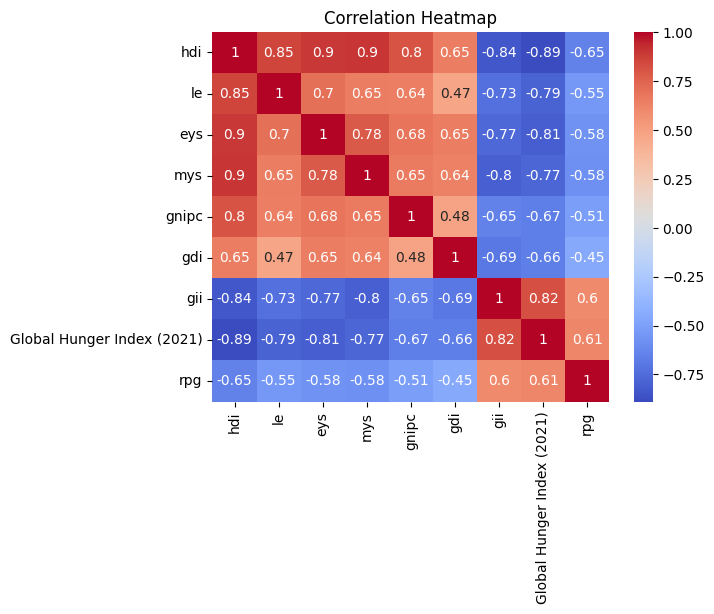

In [25]:
subset = X_combined_fpi_rpg[['hdi', 'le', 'eys', 'mys', 'gnipc', 'gdi', 'gii','Global Hunger Index (2021)', 'rpg']]
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
subset = X_combined_fpi_rpg[['hdi', 'le', 'eys', 'mys', 'gnipc', 'gdi', 'gii','Global Hunger Index (2021)', 'rpg', 'sub_region', 'iso3']]
print(subset.isnull().sum())

hdi                            4
le                             0
eys                            3
mys                            4
gnipc                          2
gdi                            8
gii                           10
Global Hunger Index (2021)     0
rpg                            2
sub_region                     0
iso3                           0
dtype: int64


In [27]:
sub_list = subset['sub_region'].unique()

subset_grouped = subset.groupby(
    'sub_region').mean().reset_index()

/var/folders/6y/4m3vj4js64g6gpqny6htl04r0000gn/T/ipykernel_28022/4177206035.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'sub_region').mean().reset_index()


In [28]:
for region in sub_list:  
    print(region)
    for col in subset.columns.drop(['sub_region', 'iso3']):
        subset[col].fillna(value = subset_grouped[subset_grouped["sub_region"] == region][col].values[0], inplace=True) 
        print(col)


Southern Asia
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Middle Africa
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Southern Europe
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
South America
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Western Asia
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Eastern Africa
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Western Africa
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Eastern Europe
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Southern Africa
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Eastern Asia
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Central America
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Caribbean
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Northern Africa
hdi
le
eys
mys
gnipc
gdi
gii
Global Hunger Index (2021)
rpg
Northern Europe
hdi
le
eys
mys
gn

/var/folders/6y/4m3vj4js64g6gpqny6htl04r0000gn/T/ipykernel_28022/4189500386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[col].fillna(value = subset_grouped[subset_grouped["sub_region"] == region][col].values[0], inplace=True)
/var/folders/6y/4m3vj4js64g6gpqny6htl04r0000gn/T/ipykernel_28022/4189500386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[col].fillna(value = subset_grouped[subset_grouped["sub_region"] == region][col].values[0], inplace=True)
/var/folders/6y/4m3vj4js64g6gpqny6htl04r0000gn/T/ipykernel_28022/4189500386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [29]:
print(subset.isna().sum())

hdi                           0
le                            0
eys                           0
mys                           0
gnipc                         0
gdi                           0
gii                           0
Global Hunger Index (2021)    0
rpg                           0
sub_region                    0
iso3                          0
dtype: int64


In [30]:
subset.head()

,hdi,le,eys,mys,gnipc,gdi,gii,Global Hunger Index (2021),rpg,sub_region,iso3
0,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.738,34.3,3.798483,Southern Asia,AFG
1,0.478,61.9824,10.263844,2.985070,1824.190915,0.681,0.678,28.3,2.461275,Southern Asia,AFG
2,0.541,58.6231,10.082500,3.909642,7280.845666,0.848,0.545,27.8,1.866160,Middle Africa,AGO
3,0.586,61.6434,12.172100,5.417391,5465.617791,0.903,0.537,26.0,1.233384,Middle Africa,AGO
4,0.778,78.0640,14.586650,10.025110,11146.263030,0.974,0.235,8.8,-2.508854,Southern Europe,ALB


# Qual a normalização que iremos usar? 


{'whiskers': [<matplotlib.lines.Line2D at 0x282b48100>,
 'caps': [<matplotlib.lines.Line2D at 0x282b486a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x282b87df0>],
 'medians': [<matplotlib.lines.Line2D at 0x282b48c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x282b48f10>],
 'means': []}

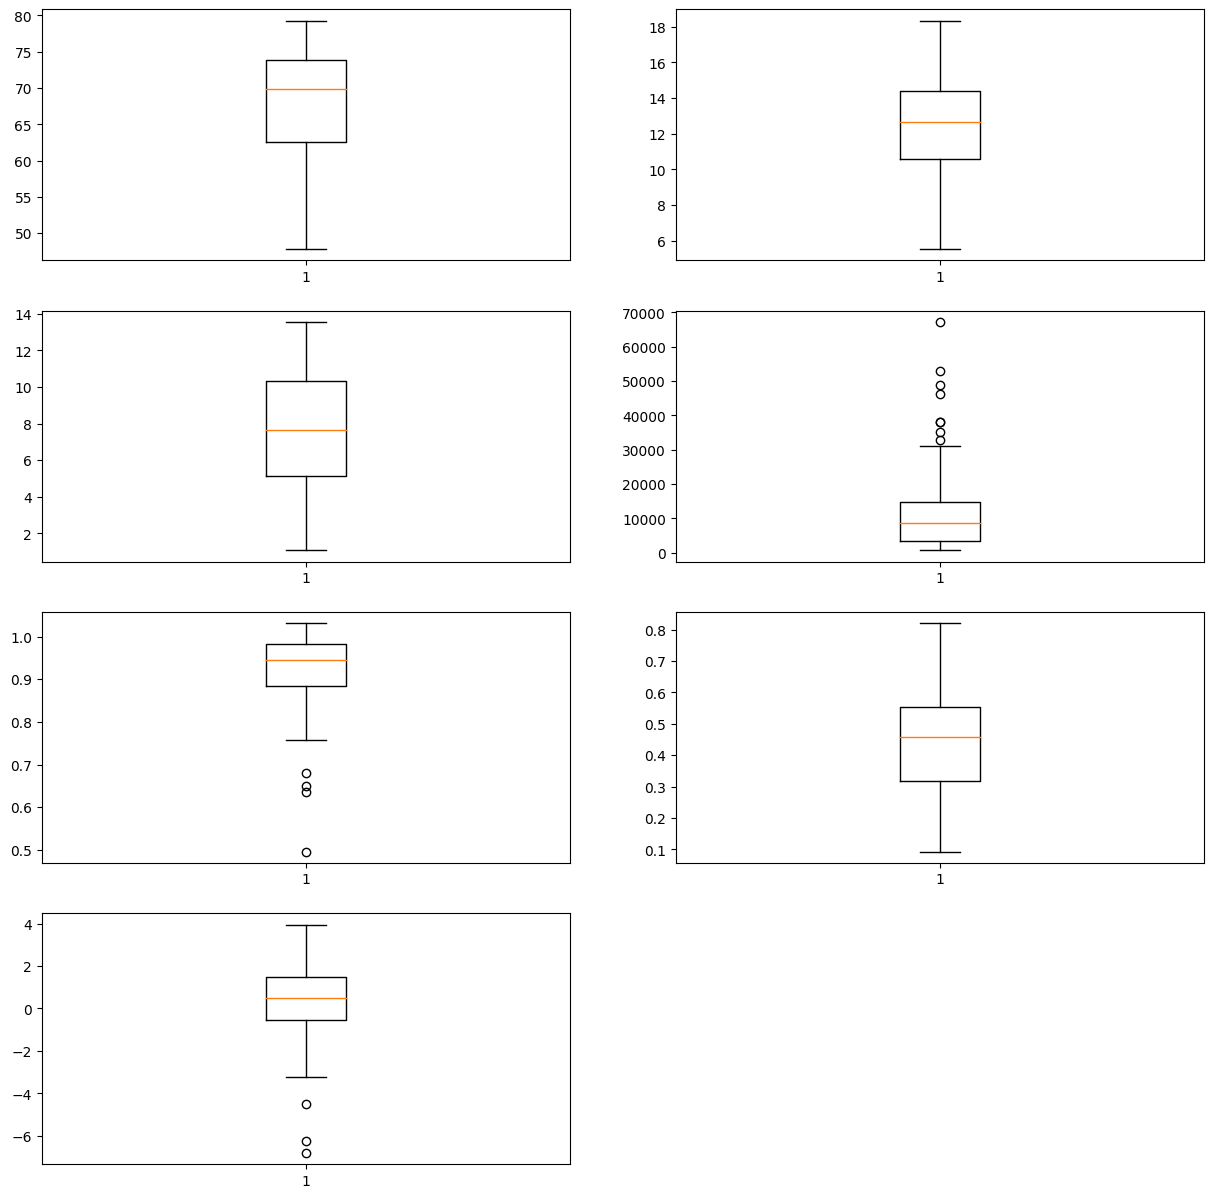

In [31]:
plt.figure(figsize = (15,15))
plt.subplot(4,2,1)
plt.boxplot(subset['le'])
plt.subplot(4,2,2)
plt.boxplot(subset['eys'])
plt.subplot(4,2,3)
plt.boxplot(subset['mys'])
plt.subplot(4,2,4)
plt.boxplot(subset['gnipc'])
plt.subplot(4,2,5)
plt.boxplot(subset['gdi'])
plt.subplot(4,2,6)
plt.boxplot(subset['gii'])
plt.subplot(4,2,7)
plt.boxplot(subset['rpg'])

### Presença de outlier --> Ecoder: RobustScaler
### SubRegion (todos os mesmos pesos) --> Encoder: OneHotEncoder
## Próximos passos
### Dropar a iso 
### Dividir o X e y
### aplicar a normalização
### Aplicação de modelo
### 1.Linear como baseline
### 2.Xboost (deep learning) --> Usado pelo site:  Vai superar ou não a regressão linear?
### 3.Decision Tree



In [32]:
data_set =subset.drop('iso3', axis=1)
data_set.head()

,hdi,le,eys,mys,gnipc,gdi,gii,Global Hunger Index (2021),rpg,sub_region
0,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.738,34.3,3.798483,Southern Asia
1,0.478,61.9824,10.263844,2.985070,1824.190915,0.681,0.678,28.3,2.461275,Southern Asia
2,0.541,58.6231,10.082500,3.909642,7280.845666,0.848,0.545,27.8,1.866160,Middle Africa
3,0.586,61.6434,12.172100,5.417391,5465.617791,0.903,0.537,26.0,1.233384,Middle Africa
4,0.778,78.0640,14.586650,10.025110,11146.263030,0.974,0.235,8.8,-2.508854,Southern Europe


In [33]:
y=data_set[['Global Hunger Index (2021)']]
X = data_set.drop(columns="Global Hunger Index (2021)")

In [34]:
X.head()

,hdi,le,eys,mys,gnipc,gdi,gii,rpg,sub_region
0,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.738,3.798483,Southern Asia
1,0.478,61.9824,10.263844,2.985070,1824.190915,0.681,0.678,2.461275,Southern Asia
2,0.541,58.6231,10.082500,3.909642,7280.845666,0.848,0.545,1.866160,Middle Africa
3,0.586,61.6434,12.172100,5.417391,5465.617791,0.903,0.537,1.233384,Middle Africa
4,0.778,78.0640,14.586650,10.025110,11146.263030,0.974,0.235,-2.508854,Southern Europe


In [35]:
y.head()

,Global Hunger Index (2021)
0,34.3
1,28.3
2,27.8
3,26.0
4,8.8


## Construção de Pipe

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', RobustScaler(), ['hdi','le','eys','mys','gnipc','gdi','gii','rpg']),
        ('categorical', OneHotEncoder(),['sub_region'])
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# pipe_prep = Pipeline([ ('preprocessor', preprocessor)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  ['hdi', 'le', 'eys', 'mys',
                                                   'gnipc', 'gdi', 'gii',
                                                   'rpg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['sub_region'])])),
                ('regressor', LinearRegression())])

In [38]:
# pipe_prep.fit_transform(X_train)

In [39]:
X_train.head()

,hdi,le,eys,mys,gnipc,gdi,gii,rpg,sub_region
228,0.773,71.6273,14.881880,11.370937,12839.410110,1.013,0.311,-0.544438,Eastern Europe
208,0.381,50.5401,7.460413,1.991038,1716.422671,0.758,0.703,3.374668,Middle Africa
96,0.660,68.0232,11.177977,7.513722,9860.994781,0.802,0.569,3.953385,Western Asia
167,0.805,76.2233,13.057879,10.540590,26956.837070,1.017,0.392,0.166107,Central America
84,0.599,71.7344,10.064350,5.518220,4729.263681,0.966,0.462,0.552481,Central America


In [40]:
X_train.describe

<bound method NDFrame.describe of        hdi       le        eys        mys         gnipc    gdi    gii  \
228  0.773  71.6273  14.881880  11.370937  12839.410110  1.013  0.311   
208  0.381  50.5401   7.460413   1.991038   1716.422671  0.758  0.703   
96   0.660  68.0232  11.177977   7.513722   9860.994781  0.802  0.569   
167  0.805  76.2233  13.057879  10.540590  26956.837070  1.017  0.392   
84   0.599  71.7344  10.064350   5.518220   4729.263681  0.966  0.462   
..     ...      ...        ...        ...           ...    ...    ...   
106  0.675  68.9933  12.683340  11.159049   4160.447227  0.975  0.388   
14   0.525  59.8210  10.766680   4.304786   3408.965923  0.880  0.602   
92   0.598  67.8872  11.524860   5.538720   4529.016173  0.826  0.571   
179  0.821  74.1847  14.229900  11.275120  30027.291310  0.994  0.282   
102  0.783  69.1295  15.107650  11.412270  19217.179350  1.003  0.248   

          rpg       sub_region  
228 -0.544438   Eastern Europe  
208  3.374668    Middle

In [41]:
y_train

,Global Hunger Index (2021)
228,6.9
208,45.7
96,27.5
167,8.9
84,13.8
...,...
106,11.7
14,22.2
92,28.8
179,2.5


In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  ['hdi', 'le', 'eys', 'mys',
                                                   'gnipc', 'gdi', 'gii',
                                                   'rpg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['sub_region'])])),
                ('regressor', LinearRegression())])

In [43]:
# Predict using the trained pipeline
predictions = pipeline.predict(X_test)

In [44]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(pipeline,X,y,cv = 5)
score.mean()

0.7258989399033849

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 59.29181564982745
Root Mean Squared Error (RMSE): 7.700117898436845
Mean Absolute Error (MAE): 4.179216666011195
R-squared (R2) Score: 0.65274888771254


# Modelo Regressão linear/Baseline 
## R²=0,726/0,653 ; 
## MAE = 4,179; 
## RMSE = 7,700; 
## MSE= 59,292

In [46]:
from sklearn.tree import DecisionTreeRegressor

pipeline_DT = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

pipeline_DT.fit(X_train,y_train)
pipeline_DT.predict(X_test)

array([ 6.2,  8.6, 17. , 18.6,  2.5, 20.5, 26.2,  2.5,  6.8,  7.7,  6.9,
        8.6, 36.3, 10.4, 24.3, 27.4, 42.5, 24.8, 26.2,  6.9,  2.5,  2.5,
       19.6, 18. , 25.1, 27.4, 10.4,  6.2, 10.4, 28.3, 28.5, 19.6, 24.3,
       14. , 27.5, 20.6, 15.2, 42.5,  2.5, 10.2, 17.5, 10.8, 19.6, 27.5,
       42.5, 22.9, 10.4, 22.2, 10.4])

In [47]:
score = cross_val_score(pipeline_DT,X,y,cv = 5)
score.mean()

0.5799301128525757

In [48]:
predictions_DT = pipeline_DT.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, predictions_DT)
rmse = mean_squared_error(y_test, predictions_DT, squared=False)
mae = mean_absolute_error(y_test, predictions_DT)
r2 = r2_score(y_test, predictions_DT)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 35.60591836734694
Root Mean Squared Error (RMSE): 5.967069495769841
Mean Absolute Error (MAE): 4.165306122448979
R-squared (R2) Score: 0.7914687782526406


# modelo de Decision Tree 
## R²=0,576/0,806
## MAE = 3,847
## RMSE = 5,760
## MSE = 33,181

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a function to build the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim= 25))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Create the KerasRegressor
regressor = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Create the pipeline
pipeline_DL = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline to your training data
pipeline_DL.fit(X_train, y_train)

# Make predictions on the test data
predictions_DL = pipeline_DL.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, predictions_DL)
rmse = mean_squared_error(y_test, predictions_DL, squared=False)
mae = mean_absolute_error(y_test, predictions_DL)
r2 = r2_score(y_test, predictions_DL)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


/var/folders/6y/4m3vj4js64g6gpqny6htl04r0000gn/T/ipykernel_28022/3450522630.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
2023-06-06 19:46:19.310983: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Mean Squared Error (MSE): 47.51813975223544
Root Mean Squared Error (RMSE): 6.8933402463708
Mean Absolute Error (MAE): 3.9864638805389405
R-squared (R2) Score: 0.7217031271188143


In [51]:
pipeline_DL

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  ['hdi', 'le', 'eys', 'mys',
                                                   'gnipc', 'gdi', 'gii',
                                                   'rpg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['sub_region'])])),
                ('regressor',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x293bcbdc0>)])

In [52]:
from sklearn.metrics import make_scorer
scoring = make_scorer(mean_squared_error, squared=False)
cv_scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=5)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cv_scores)
print("Mean RMSE:", np.mean(cv_scores))

Cross-Validation RMSE Scores: [6.1908072  4.68867188 5.57142049 4.8687743  8.86827379]
Mean RMSE: 6.037589532116863


# Modelo Deep Learning/Redes neurais com Sequential/KerasRegressor
## R² = 0,74
## RMSE= 6,04
## MAE = 3,91
## MSE = 44,50

In [53]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Criar o modelo XGBoost
model = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

# Criar o pipeline
pipeline_XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Ajustar o pipeline aos dados de treinamento
pipeline_XGB.fit(X_train, y_train)

# Fazer previsões nos dados de teste
predictions_XGB = pipeline_XGB.predict(X_test)

# Calcular as métricas de avaliação
mse = mean_squared_error(y_test, predictions_XGB)
rmse = mean_squared_error(y_test, predictions_XGB, squared=False)
mae = mean_absolute_error(y_test, predictions_XGB)
r2 = r2_score(y_test, predictions_XGB)

# Imprimir as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

cv_results = cross_validate(pipeline_XGB, X, y, cv=10, scoring='r2')
cv_results['test_score'].mean()


Mean Squared Error (MSE): 55.77751863398992
Root Mean Squared Error (RMSE): 7.468434818219271
Mean Absolute Error (MAE): 4.538803340950791
R-squared (R2) Score: 0.6733308775585811


0.7466929075384054

In [54]:
pipeline_XGB.named_steps.items()

dict_items([('preprocessor', ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                 ['hdi', 'le', 'eys', 'mys', 'gnipc', 'gdi',
                                  'gii', 'rpg']),
                                ('categorical', OneHotEncoder(),
                                 ['sub_region'])])), ('model', XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
      

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_depth': [5, 10, 15],
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__booster': ['gbtree', 'gblinear']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline_XGB,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[19:46:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:46:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsam

{'model__booster': 'gbtree',
 'model__learning_rate': 0.1,
 'model__max_depth': 15,
 'model__n_estimators': 100}

In [56]:
model = grid_search.best_estimator_
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  ['hdi', 'le', 'eys', 'mys',
                                                   'gnipc', 'gdi', 'gii',
                                                   'rpg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['sub_region'])])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enab...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=15, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [57]:
import joblib

joblib.dump(model, '/Users/giovannicabral/hitw/xgbmodel.pkl')

['/Users/giovannicabral/hitw/xgbmodel.pkl']

In [62]:
model.predict(X_test).tolist()

[4.2730488777160645,
 7.149755001068115,
 21.597698211669922,
 22.292160034179688,
 3.6604197025299072,
 14.806455612182617,
 31.94662857055664,
 3.358729839324951,
 9.50332260131836,
 9.37315845489502,
 9.933369636535645,
 11.743670463562012,
 34.41459274291992,
 11.291145324707031,
 19.192554473876953,
 24.948671340942383,
 35.0662956237793,
 23.867727279663086,
 33.661773681640625,
 9.020345687866211,
 4.795206069946289,
 4.720524311065674,
 24.002883911132812,
 14.904947280883789,
 24.794443130493164,
 22.818355560302734,
 12.22083568572998,
 5.538316249847412,
 14.937126159667969,
 25.375648498535156,
 24.103261947631836,
 22.455699920654297,
 18.697925567626953,
 12.87032413482666,
 22.044334411621094,
 12.423913955688477,
 17.849773406982422,
 26.739273071289062,
 2.5370075702667236,
 9.661543846130371,
 21.568084716796875,
 10.834945678710938,
 17.89586639404297,
 24.837055206298828,
 25.834331512451172,
 30.69045066833496,
 12.143423080444336,
 26.7816219329834,
 14.4711761474